In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

In [2]:
url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv"
data = pd.read_csv(url)

In [3]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
X = data.drop('species', axis=1)
y = data['species']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [6]:
gaussian = GaussianNB()
gaussian.fit(X_train, y_train)

GaussianNB()

In [7]:
y_pred = gaussian.predict(X_test)
y_pred[:5]

array(['versicolor', 'setosa', 'virginica', 'versicolor', 'versicolor'],
      dtype='<U10')

In [8]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

precision = precision_score(y_test, y_pred, average='micro')
recall = recall_score(y_test, y_pred, average='micro')

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")

Accuracy: 0.98
Precision: 0.98
Recall: 0.98


In [9]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[19  0  0]
 [ 0 12  1]
 [ 0  0 13]]


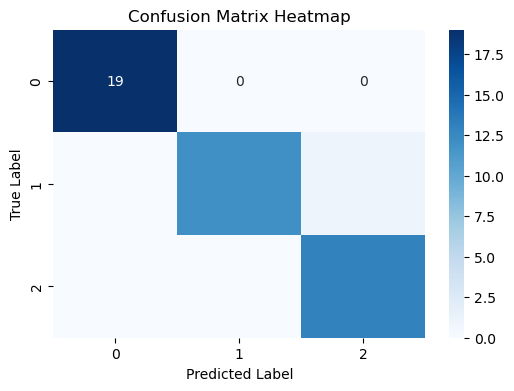

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix Heatmap')
plt.show()

In [11]:
from sklearn.metrics import classification_report

report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      0.92      0.96        13
   virginica       0.93      1.00      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.97        45
weighted avg       0.98      0.98      0.98        45



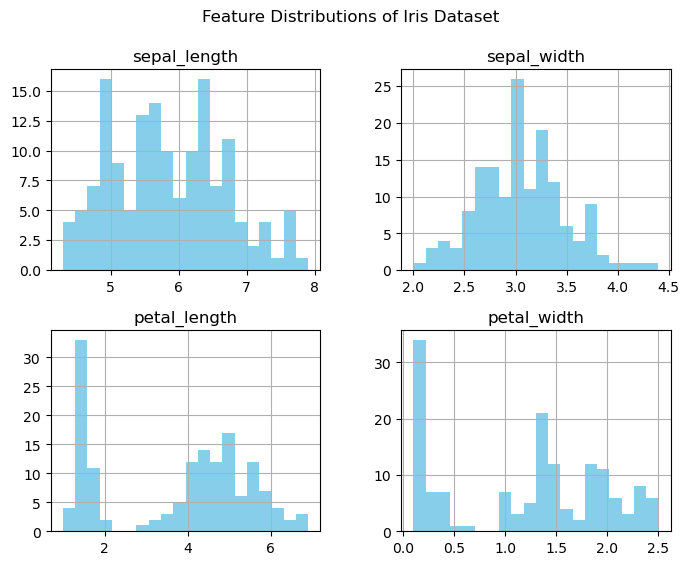

In [12]:
data.hist(figsize=(8, 6), bins=20, color='skyblue')
plt.suptitle('Feature Distributions of Iris Dataset')
plt.show()

In [13]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(gaussian, X, y, cv=5)

print(f"Average Accuracy using Cross-Validation: {cv_scores.mean():.2f}")

Average Accuracy using Cross-Validation: 0.95


In [14]:

FP = cm.sum(axis=0) - np.diag(cm)
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = cm.sum() - (FP + FN + TP)

cm_values = TP, FP, FN, TN


In [15]:
df = pd.DataFrame(data=cm_values, columns=['setosa', 'versicolor', 'virginica'], index=['TP','FP','FN','TN'])
df

,setosa,versicolor,virginica
TP,19,12,13
FP,0,0,1
FN,0,1,0
TN,26,32,31
